# Deliverable 2: Scrape and Analyse the Mars Weather Data

In [33]:
# Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager


In [34]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

# 1: Visit the Website

In [35]:
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

# 2: Scrape the Table

In [36]:
# Produce Beautiful Soup
html = browser.html
sp = soup(html, 'html.parser')

In [37]:
# Extract all rows and headers from data
headers = sp.find_all('th')
results = sp.find('table', class_='table')

info = sp.find_all('tr', class_='data-row')

# 3: Store the Data

In [38]:
# Create an empty list
table_headers = []
id = []
terrestrial_date = []
pressure = []
sol = []
month = []
ls = []
min_temp = []

# Retrieve and append all table headers
for header in headers:
    table_headers.append(header.text)
    
# retrieve all the data provided
for i in info:

    # id
    mars_data_id = i.find('td')
    id.append(int(mars_data_id.text))
    
    # terrestial dates
    terrestrial_date.append(mars_data_id.find_next_sibling('td').text)
    mars_data_id = mars_data_id.find_next_sibling('td')
    
    # sol
    sol.append(int(mars_data_id.find_next_sibling("td").text))
    mars_data_id = mars_data_id.find_next_sibling("td")
    
    # ls
    ls.append(int(mars_data_id.find_next_sibling("td").text))
    mars_data_id = mars_data_id.find_next_sibling('td')
    
    # month
    month.append(int(mars_data_id.find_next_sibling("td").text))
    mars_data_id = mars_data_id.find_next_sibling("td")
    
    # min_temp
    min_temp.append(float(mars_data_id.find_next_sibling("td").text))
    mars_data_id = mars_data_id.find_next_sibling("td")
    
    # pressure
    pressure.append(float(mars_data_id.find_next_sibling("td").text))

In [39]:
# Create a Pandas DataFrame
mars_data_df = pd.DataFrame(columns = table_headers)
mars_data_df["id"] = id
mars_data_df["terrestrial_date"] = terrestrial_date
mars_data_df["sol"] = sol
mars_data_df["pressure"] = pressure
mars_data_df["month"] = month
mars_data_df["ls"] = ls
mars_data_df["min_temp"] = min_temp


In [40]:
mars_data_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


#  4: Prepare Data

In [41]:
# Examine data type of each column
mars_data_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [42]:
# Change data types for data analysis
mars_data_df = mars_data_df.astype({'terrestrial_date':'datetime64'})

In [43]:
mars_data_df.dtypes


id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

# Fifth Step: Analyse the Data

In [44]:
# 1. How many months are there on Mars?

months =  mars_data_df.groupby('month')['id'].nunique()
number_of_months = mars_data_df['month'].nunique()


print(f"There are {number_of_months} months on Mars.")
print(f"The following are the {number_of_months} months, with the number of occurences in the dataset:")
print(months)

There are 12 months on Mars.
The following are the 12 months, with the number of occurences in the dataset:
month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: id, dtype: int64


In [45]:
# 2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?

data_martian_days = mars_data_df['sol'].nunique()
print(f"There are {data_martian_days} Martian days' worth of data in the dataset.")





There are 1867 Martian days' worth of data in the dataset.


In [46]:
# 3.What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
#   Find the average the minimum daily temperature for all of the months.
#   Plot the results as a bar chart.

average_low_temperature = mars_data_df.groupby('month')['min_temp'].mean()
average_low_temperature

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

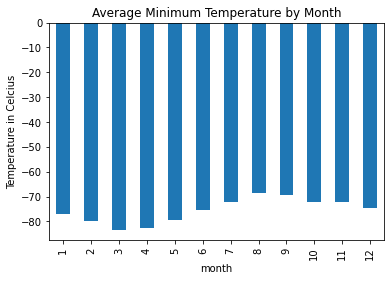

In [47]:
average_low_temperature.plot(kind="bar", ylabel="Temperature in Celcius", title="Average Minimum Temperature by Month")
plt.show()

The coldest month in Curiosity's location is 3 and the hottest month in Curiosity's location is 8.


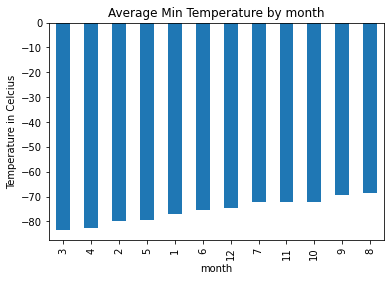

In [48]:
# Identify the coldest and hottest months in Curiosity's location

curiosity_average_low_temp = average_low_temperature.sort_values()

coldest_month = curiosity_average_low_temp.index[0]
hottest_month = curiosity_average_low_temp.index[-1]

print(f"The coldest month in Curiosity's location is {coldest_month} and the hottest month in Curiosity's location is {hottest_month}.")

curiosity_average_low_temp.plot(kind="bar", ylabel="Temperature in Celcius", title="Average Min Temperature by month")
plt.show()





In [49]:
# 4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
#    Find the average the daily atmospheric pressure of all the months.
#    Plot the results as a bar chart.


average_pressure = mars_data_df.groupby('month')['pressure'].mean()
average_pressure



month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

The month with the lowest atmospheric pressure is 6 and month with the highest atmospheric pressure is 9.


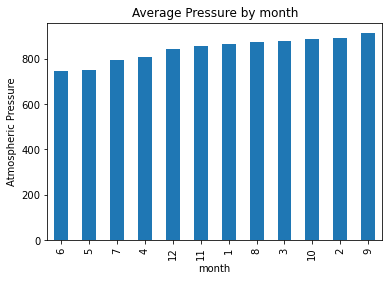

In [50]:
average_pressure_mars = average_pressure.sort_values()

lowest_pressure = average_pressure_mars.index[0]
highest_pressure = average_pressure_mars.index[-1]

print(f"The month with the lowest atmospheric pressure is {lowest_pressure} and month with the highest atmospheric pressure is {highest_pressure}.")

average_pressure_mars.plot(kind="bar", ylabel="Atmospheric Pressure", title="Average Pressure by month")
plt.show()

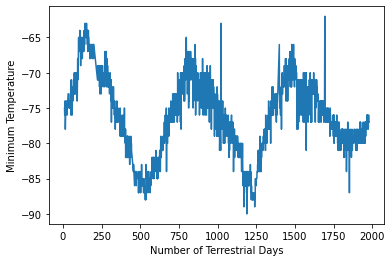

In [51]:
# 5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
#    Consider how many days elapse on Earth in the time that Mars circles the Sun once.
#    Visually estimate the result by plotting the daily minimum temperature.

x = mars_data_df['sol']
y = mars_data_df['min_temp']
plt.plot(x, y)
plt.ylabel('Minimum Temperature')
plt.xlabel('Number of Terrestrial Days')
plt.show()

In [52]:
min_temp_mars = mars_data_df[['min_temp', 'sol']]
min_temp_mars

,min_temp,sol
0,-75.0,10
1,-76.0,11
2,-76.0,12
3,-74.0,13
4,-74.0,14
...,...,...
1862,-78.0,1973
1863,-77.0,1974
1864,-76.0,1975
1865,-77.0,1976


In [53]:
min_temp_mars = min_temp_mars.sort_values('min_temp', ascending=False)

min_temp_mars.head(10)




,min_temp,sol
1582,-62.0,1692
926,-63.0,1020
138,-63.0,152
129,-63.0,143
95,-64.0,109
150,-64.0,164
143,-64.0,157
141,-64.0,155
136,-64.0,150
131,-64.0,145


In [57]:
mars_days_year = min_temp_mars.index[0] - min_temp_mars.index[1]

conclusion = (
    f"The data is organised to be able to obtain peak temperatures."
    f" The two peak temperatures are on sols {min_temp_mars.index[0]} and {min_temp_mars.index[1]} respectively."
    f" The difference between these two days is {mars_days_year}. Therefore, we can assume that a Mars year is approximately {mars_days_year} earth days."
    f" On google, a Mars year is said to be 687 earth days long. Therefore, as shown with the analysis, there is an insginificant difference between the dataset values and the estimated days in a year on Mars from a google search."
)    
print(conclusion)

The data is organised to be able to obtain peak temperatures. The two peak temperatures are on sols 1582 and 926 respectively. The difference between these two days is 656. Therefore, we can assume that a Mars year is approximately 656 earth days. On google, a Mars year is said to be 687 earth days long. Therefore, as shown with the analysis, there is an insginificant difference between the dataset values and the estimated days in a year on Mars from a google search.


# 6: Save Data

In [58]:
# Write the data to a CSV
csv_file = "./output_files/mars_data.csv"

mars_data_df.to_csv(csv_file, header=True, index=False)

In [59]:
browser.quit()